In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
#rcParams['figure.figsize'] = 15, 15
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
#prouni_2005 = '../prouni/~data/'
#data = pd.read_csv(prouni_2005, error_bad_lines=True, sep=';', encoding='latin-1')
# Importing and concatenating our datasets

#filenames = glob('../prouni/~data/PDA_PROUNI*.csv')

#df = [pd.read_csv(f, error_bad_lines=True, sep=';', encoding='latin-1') for f in filenames]
#df = pd.concat(df, ignore_index=True)

df = pd.read_csv('../prouni/~data/PDA_PROUNI_2005_CSV.csv', sep=';', encoding='latin-1')
df = df.sample(100)

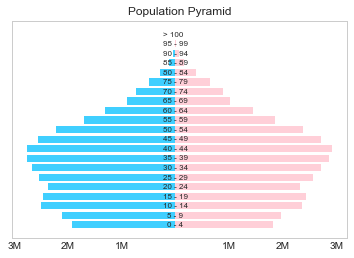

In [11]:
age = np.array(
    ["0 - 4", "5 - 9", "10 - 14", "15 - 19", "20 - 24", "25 - 29", "30 - 34", "35 - 39",
     "40 - 44", "45 - 49", "50 - 54", "55 - 59", "60 - 64", "65 - 69", "70 - 74",
     "75 - 79", "80 - 84", "85 - 89", "90 - 94", "95 - 99", "> 100"])
m = np.array(
    [1915887, 2100931, 2494484, 2464805, 2361297, 2529633, 2669927, 2754129, 2753282,
     2552531, 2211649, 1697221, 1311024, 902675, 722246, 482686, 273915, 108639, 35867,
     10965, 1238])
f = np.array(
    [1823981, 1980712, 2369795, 2435784, 2330223, 2562964, 2724990, 2860720, 2918730,
     2713534, 2376384, 1869867, 1454373, 1030677, 885393, 640698, 388748, 172302, 64170,
     19868, 2711])
x = np.arange(age.size)
tick_lab = ['3M', '2M', '1M', '1M', '2M', '3M']
tick_val = [-3000000, -2000000, -1000000, 1000000, 2000000, 3000000]


def plot_pyramid():
    plt.barh(x, -m, alpha=.75, height=.75, align='center' , color="deepskyblue")
    plt.barh(x, f, alpha=.75, height=.75, align='center', color="pink")
    #plt.yticks(x, age)
    plt.yticks([])
    plt.xticks(tick_val, tick_lab)
    plt.grid(b=False)
    plt.title("Population Pyramid")
    for i, j in enumerate(age):
        if i==0 or i==1:
            plt.text(-150000, x[i]-0.2, j, fontsize=8)
        else:    
            plt.text(-230000, x[i]-0.2, j, fontsize=8)
    plt.show()


if __name__ == '__main__':
    plot_pyramid()

In [31]:
age = df.P_AGE.unique()
print(age)

[19 18 20 23 22 42 21 29 33 26 17 30 31 28 39 27 32 24 25 37]


In [16]:
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
26925,2005,793,Centro Universitário Estácio Radial de São Pau...,BOLSA INTEGRAL,PRESENCIAL,Sistemas Para Internet,Matutino,***053998**,Feminino,Branca,24-04-1986,NÃO,SUDESTE,SP,SÃO PAULO
84564,2005,453,CENTRO UNIVERSITÁRIO LUTERANO DE PALMAS,BOLSA INTEGRAL,PRESENCIAL,Direito,Matutino,***697581**,Masculino,Preta,05-11-1987,NÃO,NORTE,TO,LAVANDEIRA
29284,2005,1388,FACULDADE SUMARÉ,BOLSA INTEGRAL,PRESENCIAL,Administração - Gestão De Negócios,Noturno,***801568**,Feminino,Parda,06-02-1985,NÃO,SUDESTE,SP,SÃO PAULO
30485,2005,1639,FACULDADE HÉLIO ROCHA,BOLSA PARCIAL 50%,PRESENCIAL,Sistema De Informação,Noturno,***246215**,Feminino,Preta,04-09-1987,NÃO,NORDESTE,BA,SALVADOR
30165,2005,1524,FACULDADES INTEGRADAS OLGA METTIG,BOLSA INTEGRAL,PRESENCIAL,Turismo,Matutino,***066685**,Masculino,Branca,25-06-1987,NÃO,NORDESTE,BA,SALVADOR


In [17]:
df['DT_NASCIMENTO_BENEFICIARIO'] = pd.to_datetime(df.DT_NASCIMENTO_BENEFICIARIO)
df['YEAR_NASC'] = df.DT_NASCIMENTO_BENEFICIARIO.dt.year
df['P_AGE'] = df.ANO_CONCESSAO_BOLSA - df.YEAR_NASC

In [18]:
df.columns

Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'NOME_CURSO_BOLSA',
       'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO_BOLSA',
       'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA',
       'DT_NASCIMENTO_BENEFICIARIO', 'BENEFICIARIO_DEFICIENTE_FISICO',
       'REGIAO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA',
       'MUNICIPIO_BENEFICIARIO_BOLSA', 'YEAR_NASC', 'P_AGE'],
      dtype='object')

In [19]:
df = df[['ANO_CONCESSAO_BOLSA', 'NOME_IES_BOLSA', 'TIPO_BOLSA', 'NOME_CURSO_BOLSA',
         'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA',
        'BENEFICIARIO_DEFICIENTE_FISICO', 'SIGLA_UF_BENEFICIARIO_BOLSA',
         'MUNICIPIO_BENEFICIARIO_BOLSA', 'P_AGE', 'REGIAO_BENEFICIARIO_BOLSA']]

In [20]:
df.columns

Index(['ANO_CONCESSAO_BOLSA', 'NOME_IES_BOLSA', 'TIPO_BOLSA',
       'NOME_CURSO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA',
       'RACA_BENEFICIARIO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO',
       'SIGLA_UF_BENEFICIARIO_BOLSA', 'MUNICIPIO_BENEFICIARIO_BOLSA', 'P_AGE',
       'REGIAO_BENEFICIARIO_BOLSA'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 26925 to 82597
Data columns (total 11 columns):
ANO_CONCESSAO_BOLSA               100 non-null int64
NOME_IES_BOLSA                    99 non-null object
TIPO_BOLSA                        100 non-null object
NOME_CURSO_BOLSA                  100 non-null object
SEXO_BENEFICIARIO_BOLSA           100 non-null object
RACA_BENEFICIARIO_BOLSA           100 non-null object
BENEFICIARIO_DEFICIENTE_FISICO    100 non-null object
SIGLA_UF_BENEFICIARIO_BOLSA       100 non-null object
MUNICIPIO_BENEFICIARIO_BOLSA      100 non-null object
P_AGE                             100 non-null int64
REGIAO_BENEFICIARIO_BOLSA         100 non-null object
dtypes: int64(2), object(9)
memory usage: 9.4+ KB


In [22]:
#Covertendo colunas para ccategorias
df['TIPO_BOLSA'] = df.TIPO_BOLSA.astype('category')
df['SIGLA_UF_BENEFICIARIO_BOLSA'] = df.SIGLA_UF_BENEFICIARIO_BOLSA.astype('category')
df['SEXO_BENEFICIARIO_BOLSA'] = df.SEXO_BENEFICIARIO_BOLSA.astype('category')
df['BENEFICIARIO_DEFICIENTE_FISICO'] = df.BENEFICIARIO_DEFICIENTE_FISICO.astype('category')
df['RACA_BENEFICIARIO_BOLSA'] = df.RACA_BENEFICIARIO_BOLSA.astype('category')
df['REGIAO_BENEFICIARIO_BOLSA'] = df.REGIAO_BENEFICIARIO_BOLSA.astype('category')
rcParams['figure.figsize'] = 15, 15

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 26925 to 82597
Data columns (total 11 columns):
ANO_CONCESSAO_BOLSA               100 non-null int64
NOME_IES_BOLSA                    99 non-null object
TIPO_BOLSA                        100 non-null category
NOME_CURSO_BOLSA                  100 non-null object
SEXO_BENEFICIARIO_BOLSA           100 non-null category
RACA_BENEFICIARIO_BOLSA           100 non-null category
BENEFICIARIO_DEFICIENTE_FISICO    100 non-null category
SIGLA_UF_BENEFICIARIO_BOLSA       100 non-null category
MUNICIPIO_BENEFICIARIO_BOLSA      100 non-null object
P_AGE                             100 non-null int64
REGIAO_BENEFICIARIO_BOLSA         100 non-null category
dtypes: category(6), int64(2), object(3)
memory usage: 6.7+ KB


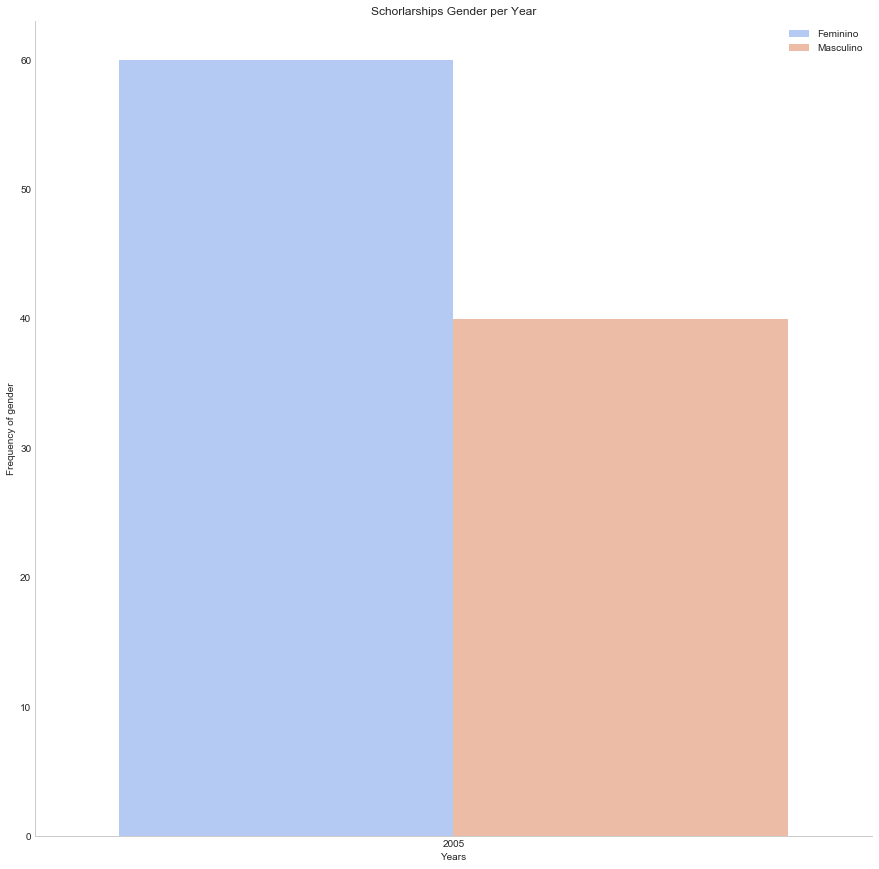

In [13]:
#Scholarship Gender per Year
sns.countplot(x='ANO_CONCESSAO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA', data=df, palette='coolwarm')
plt.ylabel('Frequency of gender')
plt.xlabel('Years')
plt.title('Schorlarships Gender per Year')
plt.legend(loc=0, title=None)
plt.grid(False)
sns.despine()
plt.show()

In [60]:
sorted(df.P_AGE[df['P_AGE'] > 50])

[53]

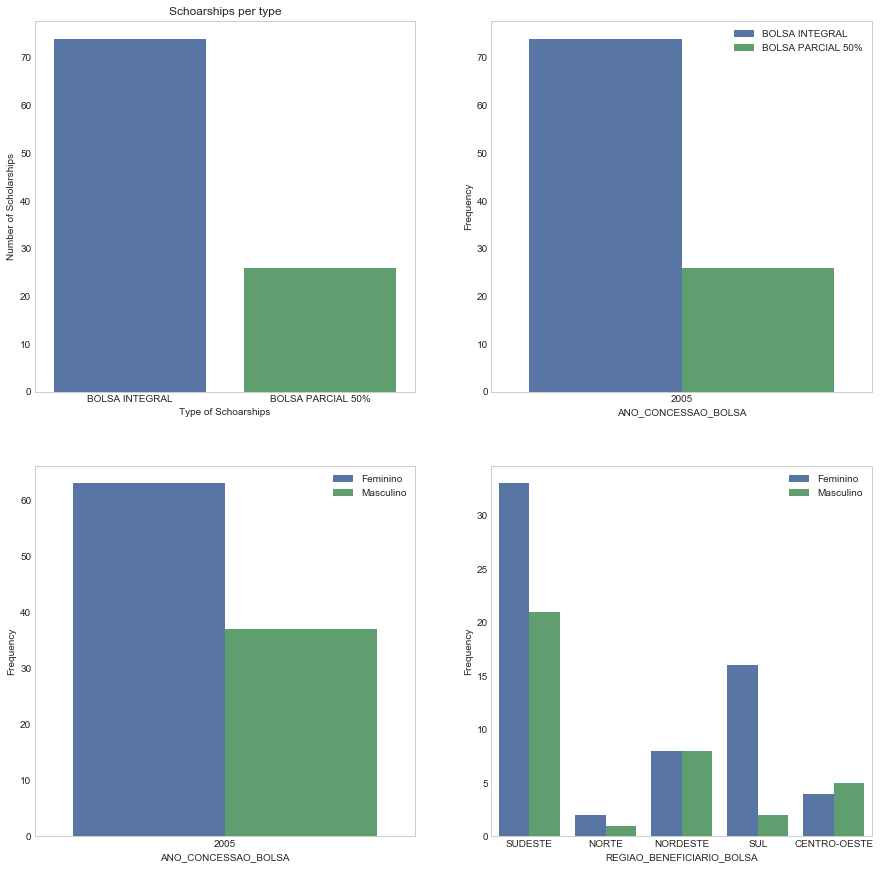

In [62]:
plt.subplot(2, 2, 1)
sns.countplot(x='TIPO_BOLSA', data=df, palette='deep')
plt.title('Schoarships per type')
plt.ylabel('Number of Scholarships')
plt.xlabel('Type of Schoarships')
plt.grid(False)


plt.subplot(2, 2, 2)
sns.countplot(x='ANO_CONCESSAO_BOLSA', hue='TIPO_BOLSA' , data=df, palette='deep')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend(loc=0, title=None)

plt.subplot(2, 2, 3)
sns.countplot(x='ANO_CONCESSAO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA' , data=df, palette='deep')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend(loc=0, title=None)

plt.subplot(2, 2, 4)
sns.countplot(x='REGIAO_BENEFICIARIO_BOLSA', hue='SEXO_BENEFICIARIO_BOLSA' , data=df, palette='deep')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend(loc=0, title=None)


plt.show()

In [ ]:

sns.countplot(x='TIPO_BOLSA', data=df, palette='deep')